In [10]:
import os
import sys
import glob

import h5py
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

sys.path.append('/scratch_net/biwidl319/jbermeo/MastersThesisUIASegmentation/tta_uia_segmentation/src')
from preprocessing.utils import get_filepaths

# Check outputs of DDPM

In [31]:
img_path = '/scratch_net/biwidl319/jbermeo/logs/brain/ddpm/hcp_t1/sample-9.png'

In [32]:
# open image with numpy 
from PIL import Image

image = Image.open(img_path)

In [33]:
a = np.array(image)
a.shape

(1292, 1292, 2)

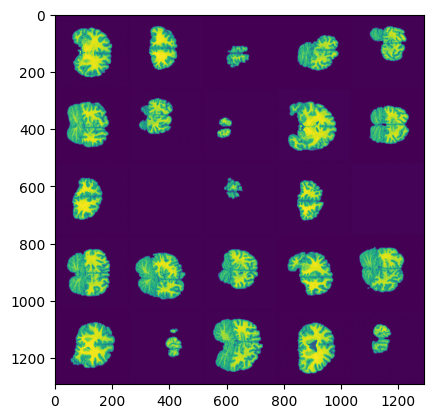

In [34]:
plt.imshow(a[:,:,0])

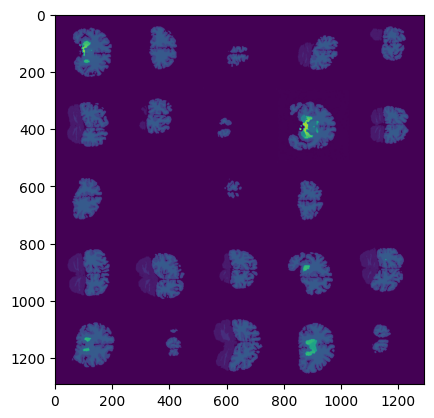

In [35]:
plt.imshow(a[:,:,1])

In [16]:
from matplotlib.colors import ListedColormap
image_array = np.random.randint(0, 15, size=(100, 100))
colors = plt.cm.get_cmap('tab20c', 15)
cmap = ListedColormap(colors(range(15)))

/tmp/ipykernel_16395/333481183.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20c', 15)


In [24]:
np.unique(a[:, :, 1])

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
       158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170,
       171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 18

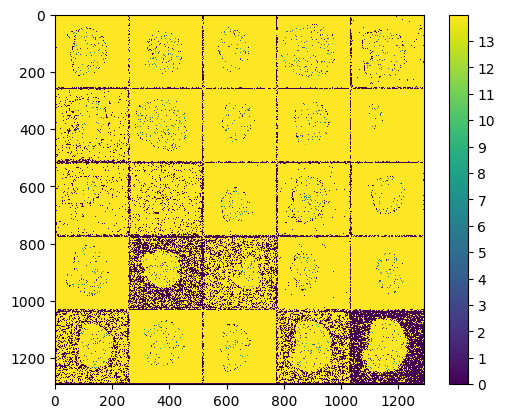

In [22]:
plt.imshow(a[:,:,1] * 15,  interpolation='nearest', vmin=0, vmax=14) 
plt.colorbar(ticks=range(14))

## Correct the Aneurysm label on image 04270916_VS_AComm

### Raw

In [6]:
img_path = '/scratch_net/biwidl319/jbermeo/data/raw/USZ/04270916_VS_AComm_Checked'

In [7]:
os.listdir(img_path)

['04270916_VS_AComm_Checked_seg.nii.gz',
 '04270916_VS_AComm_Checked_tof.nii.gz']

In [12]:
seg = nib.load(os.path.join(img_path, '04270916_VS_AComm_Checked_seg.nii.gz'))

In [16]:
# Remap label 11 to 4
seg_data = seg.get_fdata()
seg_data[seg_data == 11] = 4
seg_data = seg_data.astype(np.uint8)
nib.save(nib.Nifti1Image(seg_data, seg.affine, seg.header), os.path.join(img_path, '04270916_VS_AComm_Checked_seg_corrected.nii.gz'))

In [17]:
np.unique(seg_data)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17,
       19], dtype=uint8)

### Resampled

In [18]:
img_path = '/scratch_net/biwidl319/jbermeo/data/preprocessed/1_resampled/USZ/04270916_VS_AComm_Checked'

In [19]:
seg = nib.load(os.path.join(img_path, '04270916_VS_AComm_Checked_seg.nii.gz'))

In [21]:
seg_data = seg.get_fdata()
seg_data[seg_data == 11] = 4
seg_data = seg_data.astype(np.uint8)
nib.save(nib.Nifti1Image(seg_data, seg.affine, seg.header), os.path.join(img_path, '04270916_VS_AComm_Checked_seg_corrected.nii.gz'))

In [ ]:
np.unique(seg_data)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17,
       19], dtype=uint8)

## Check distribution of field of views on resample images

In [51]:
a = get_filepaths(preprocessed=True, path_to_dir='/scratch_net/biwidl319/jbermeo/data/preprocessed/1_resampled/Lausanne', every_scan_has_seg=False)

In [53]:
shapes = list()
for idx, img_fps in a.items():
    img = nib.load(img_fps['tof'])
    shapes.append(img.shape)
    
    # print pixel spacing
    print(img.header.get_zooms())
    

In [33]:
# USZ
np.median(np.array(shapes), axis=0)

array([566., 666., 181.])

In [39]:
# ADAM
np.median(np.array(shapes), axis=0)

array([666., 666., 116.])

In [54]:
# Lausanne
np.median(np.array(shapes), axis=0)

array([570., 700., 166.])

(array([ 3.,  1., 18.,  7.,  9.,  1.,  0.,  0.,  7., 10.]),
 array([499. , 519.1, 539.2, 559.3, 579.4, 599.5, 619.6, 639.7, 659.8,
        679.9, 700. ]),
 <BarContainer object of 10 artists>)

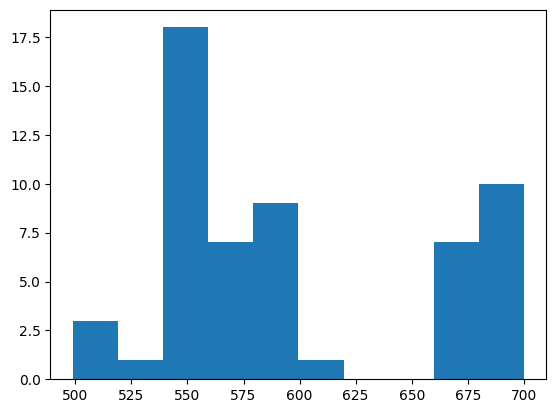

In [60]:
# plot histogram
import matplotlib.pyplot as plt
plt.hist(np.array(shapes)[:, 0],)

(array([ 1.,  0.,  0.,  3.,  0.,  0., 39.,  0., 12.,  1.]),
 array([600. , 616.6, 633.2, 649.8, 666.4, 683. , 699.6, 716.2, 732.8,
        749.4, 766. ]),
 <BarContainer object of 10 artists>)

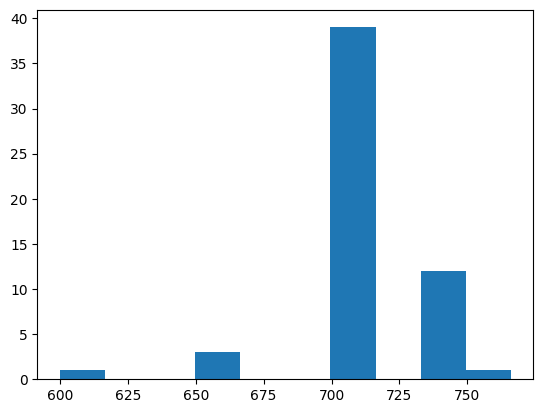

In [62]:
plt.hist(np.array(shapes)[:, 1])

## Resampling and reszing with nibabel

In [39]:
import h5py
import numpy as np
import nibabel as nib
import nibabel.processing as nibp
import matplotlib.pyplot as plt

In [40]:
ds = h5py.File('/scratch_net/biwidl319/jbermeo/data/preprocessed/UIA_segmentation/USZ.h5', 'r')

(0.6, 0.3, 0.6)


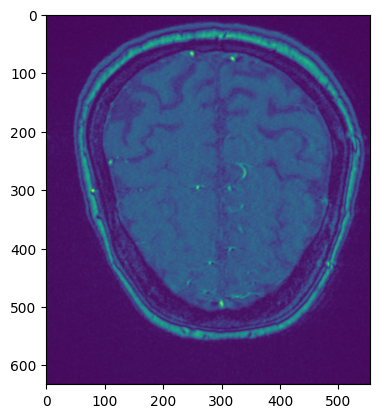

In [41]:
img_group = ds['data']['10896074_BRE_AComm_ICA']

image = img_group['tof'][:][0]
labels = img_group['seg'][:][0]
px = img_group['px'][()]
py = img_group['py'][()]
pz = img_group['pz'][()]


orig_voxel_size = (pz, py, pz)  
print(orig_voxel_size)
plt.imshow(image[60, :, :])

In [45]:
orig_voxel_size

(0.6, 0.3, 0.6)

In [43]:
# Create a nib image object with the original voxel size
affine = [
    [orig_voxel_size[0], 0, 0, 0],
    [0, orig_voxel_size[1], 0, 0], 
    [0, 0, orig_voxel_size[2], 0], 
    [0, 0, 0, 1]]
img = nib.Nifti1Image(image, affine)
img.header.set_zooms(orig_voxel_size)


In [157]:
%%timeit
a = nibp.conform(img, (150, 600, 460), voxel_size=(0.7, 0.3, 0.3), order=3)

10.8 s ± 49.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [159]:
1 / np.array([0.25, 1, 1])

array([4., 1., 1.])

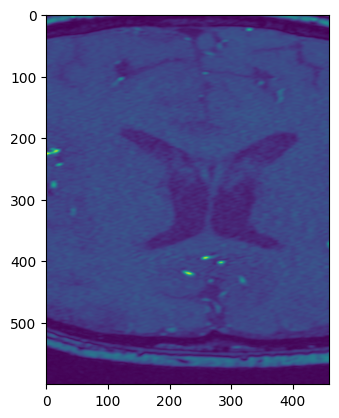

In [44]:
img = nibp.conform(img, (150, 600, 460), voxel_size=(0.7, 0.3, 0.3), order=3)  
plt.imshow(img.get_fdata()[60, :, :])

In [150]:
img.shape

(150, 600, 460)

### Check how the largest images look after cropping

In [23]:
target_size = [160, 560, 640]
target_resolution = (0.6, 0.3, 0.3)

(0.6, 0.3, 0.3)


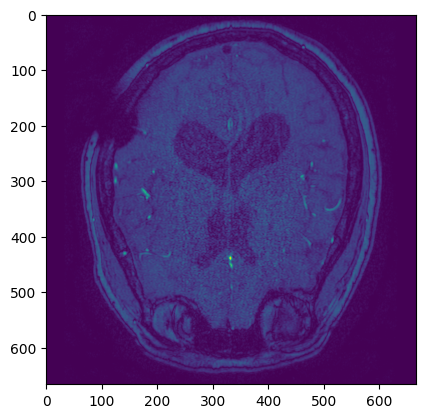

In [33]:
#img_group = ds['data']['10896074_BRE_AComm_ICA']
img_group = ds['data']['10147148-AComm-NEW']

image = img_group['tof'][:][0]
labels = img_group['seg'][:][0]
px = img_group['px'][()]
py = img_group['py'][()]
pz = img_group['pz'][()]


orig_voxel_size = (pz, px, py)  
print(orig_voxel_size)
plt.imshow(image[60, :, :])

In [34]:
affine = [
    [orig_voxel_size[0], 0, 0, 0],
    [0, orig_voxel_size[1], 0, 0], 
    [0, 0, orig_voxel_size[2], 0], 
    [0, 0, 0, 1]]
img = nib.Nifti1Image(image, affine)
img.header.set_zooms(orig_voxel_size)

In [35]:
img_cropped = nibp.conform(img, target_size, voxel_size=target_resolution, order=3)  


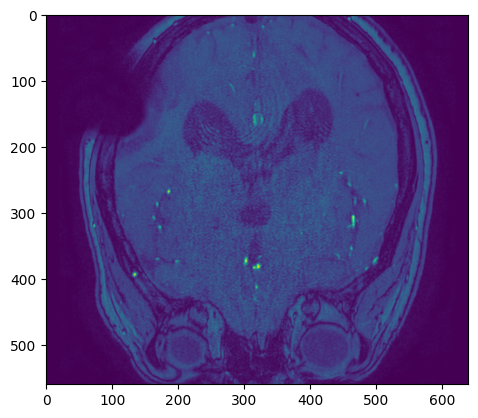

In [36]:
plt.imshow(img_cropped.get_fdata()[60, :, :])

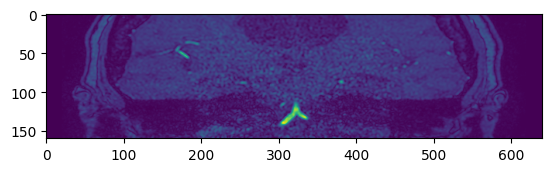

In [37]:
plt.imshow(img_cropped.get_fdata()[:, 275, :])

In [38]:
nib.save(img_cropped, f'largest_fov_largest_z_size_{target_size}_res_{target_resolution}_10147148-AComm-NEW_tof.nii.gz')

### Check how the dataset class is working

In [1]:
import sys
sys.path.append('/scratch_net/biwidl319/jbermeo/MastersThesisUIASegmentation/tta_uia_segmentation/src')

In [2]:
from dataset.dataset_h5 import DatasetH5
import matplotlib.pyplot as plt
import yaml
from pprint import pprint

In [3]:
config = yaml.load(open('/scratch_net/biwidl319/jbermeo/MastersThesisUIASegmentation/config/training_hcp_t1w.yaml', 'r'),
          Loader=yaml.FullLoader)

In [4]:
pprint(config['segmentation'])

{'augmentation': {'alpha': 1000,
                  'brightness_max': 0.1,
                  'brightness_min': 0.0,
                  'da_ratio': 0.25,
                  'gamma_max': 2.0,
                  'gamma_min': 0.5,
                  'noise_mean': 0.0,
                  'noise_std': 0.1,
                  'rot_max': 10,
                  'rot_min': -10,
                  'scale_max': 1.1,
                  'scale_min': 0.9,
                  'sigma': 20,
                  'trans_max': 10,
                  'trans_min': -10},
 'batch_size': 16,
 'bg_suppression_opts': {'bg_value': -0.5,
                         'bg_value_max': 1,
                         'bg_value_min': -0.5,
                         'hole_filling': True,
                         'mask_source': 'thresholding',
                         'thresholding': 'otsu',
                         'type': 'fixed_value'},
 'dataset': 'hcp_t1',
 'epochs': 150,
 'image_size': [1, 256, 256],
 'learning_rate': 0.001,
 'logdir': '/sc

In [5]:
bg_suppression_opts = config['segmentation']['bg_suppression_opts']
pprint(bg_suppression_opts)

{'bg_value': -0.5,
 'bg_value_max': 1,
 'bg_value_min': -0.5,
 'hole_filling': True,
 'mask_source': 'thresholding',
 'thresholding': 'otsu',
 'type': 'fixed_value'}


In [6]:
bg_suppression_opts['hole_filling'] = False
bg_suppression_opts['mask_source'] = 'ground_truth'

In [4]:
split = 'train'
ds = DatasetH5(
    h5_filepath='/scratch_net/biwidl319/jbermeo/data/preprocessed/UIA_segmentation/USZ.h5',
    fold=0,
    split=split,
    n_classes=21,
    rescale_factor=None,
    aug_params=config['segmentation']['augmentation'],
    deformation=None,
    bg_suppression_opts=config['segmentation']['bg_suppression_opts'],
    seed=0,
)

In [5]:
for a in ds:
    break

(1, 111, 566, 566) (1, 111, 566, 566) (1, 111, 566, 566)


RuntimeError: sequence argument must have length equal to input rank

In [70]:
a[4]

array([[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  Tr

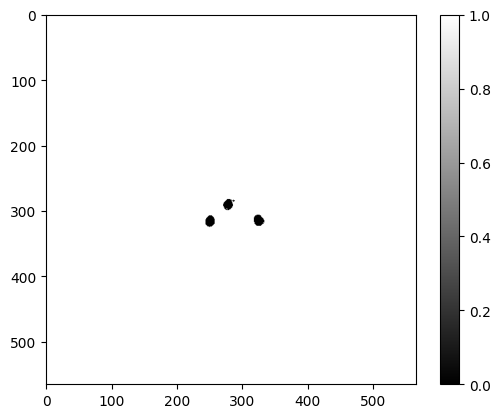

In [71]:
# Print image with a color bar showing the pixel values
plt.imshow(a[4][60, :, :], cmap='gray', vmin=0, vmax=1)
plt.colorbar()